<center>
<h1> Detecting Owls and Sheeps using YOLOv8
<h2>Marijana Rendulić
<center>

**The following sources were used in the project:**
- **Training YOLOv8 on Open images v7 dataset:** https://docs.ultralytics.com/datasets/detect/open-images-v7/#usage
> changed OpenImagesV7.yaml file to load only classes Owl and Sheep from dataset
- **Augmentation and hyperparameters:** https://docs.ultralytics.com/modes/train/#augmentation-settings-and-hyperparameters
> **Arguments:**
>> - degrees - 0.2: Rotates the image randomly within the specified degree range, improving the model's ability to recognize objects at various orientations.
>> - shear - 0.2: Shears the image by a specified degree, mimicking the effect of objects being viewed from different angles.
>> - default values
- **Metrics:** https://docs.ultralytics.com/reference/utils/metrics/ , https://docs.ultralytics.com/guides/yolo-performance-metrics/#introduction
- **Exporting model as onnx:** https://docs.ultralytics.com/modes/export/#introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon Feb 26 19:58:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 7.0 MB/s eta 0:00:00


##Install YOLO

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [6]:
# Load a COCO-pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Train the model on the Open Images V7 dataset
results = model.train(data='/content/drive/MyDrive/yolov8_codeasy/open-imagesv7.yaml', epochs=100, imgsz=640, degrees=0.2, shear=0.2)

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8_codeasy/open-imagesv7.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

INFO:fiftyone.migrations.runner:Migrating database to v0.23.5


WARNING ⚠️ Open Images V7 dataset requires at least **561 GB of free space. Starting download...


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/content/datasets/fiftyone/open-images-v7/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/content/datasets/fiftyone/open-images-v7/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [4.6s elapsed, 0s remaining, 1.3Gb/s]        


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [4.6s elapsed, 0s remaining, 1.3Gb/s]        


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/content/datasets/fiftyone/open-images-v7/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpi3g5oykv/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv' to '/content/datasets/fiftyone/open-images-v7/train/labels/detections.csv'


Only found 2550 (<1743042) samples matching your requirements


INFO:fiftyone.utils.openimages:Downloading 2550 images


 100% |█████████████████| 2550/2550 [3.9m elapsed, 0s remaining, 10.9 files/s]      


INFO:eta.core.utils: 100% |█████████████████| 2550/2550 [3.9m elapsed, 0s remaining, 10.9 files/s]      


Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 2550/2550 [12.5s elapsed, 0s remaining, 219.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2550/2550 [12.5s elapsed, 0s remaining, 219.1 samples/s]      


Dataset 'open-images-v7-train-1743042' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1743042' created


 100% |███████████████| 2550/2550 [13.3s elapsed, 0s remaining, 185.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2550/2550 [13.3s elapsed, 0s remaining, 185.4 samples/s]      


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/content/datasets/fiftyone/open-images-v7/validation' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv' to '/content/datasets/fiftyone/open-images-v7/validation/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/content/datasets/fiftyone/open-images-v7/validation/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmp7t0l_ojp/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv' to '/content/datasets/fiftyone/open-images-v7/validation/labels/detections.csv'


Only found 92 (<41620) samples matching your requirements


INFO:fiftyone.utils.openimages:Downloading 92 images


 100% |█████████████████████| 92/92 [9.1s elapsed, 0s remaining, 9.9 files/s]       


INFO:eta.core.utils: 100% |█████████████████████| 92/92 [9.1s elapsed, 0s remaining, 9.9 files/s]       


Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/content/datasets/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'validation'


 100% |███████████████████| 92/92 [467.9ms elapsed, 0s remaining, 199.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 92/92 [467.9ms elapsed, 0s remaining, 199.6 samples/s]      


Dataset 'open-images-v7-validation-41620' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-validation-41620' created


Directory '/content/datasets/open-images-v7' already exists; export will be merged with existing files


 100% |███████████████████| 92/92 [259.7ms elapsed, 0s remaining, 354.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 92/92 [259.7ms elapsed, 0s remaining, 354.2 samples/s]      


Dataset download success ✅ (567.9s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/open-images-v7/labels/train... 2550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2550/2550 [00:01<00:00, 2076.98it/s]

train: New cache created: /content/datasets/open-images-v7/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/open-images-v7/labels/val... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 1422.82it/s]

val: New cache created: /content/datasets/open-images-v7/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.56G      1.101      1.963      1.315         20        640: 100%|██████████| 160/160 [01:25<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         92        152       0.57      0.404      0.459      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.28G      1.258      1.709      1.427         16        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         92        152      0.476      0.542      0.466      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.43G      1.338        1.7      1.488         19        640: 100%|██████████| 160/160 [01:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         92        152      0.258       0.39      0.209      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.3G      1.315      1.618      1.487         27        640: 100%|██████████| 160/160 [01:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         92        152      0.558      0.621      0.553      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.23G      1.309      1.549       1.47         52        640: 100%|██████████| 160/160 [01:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         92        152      0.587       0.59      0.547      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G      1.268      1.457      1.442         20        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         92        152       0.62      0.542      0.521       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.27G      1.263      1.452      1.443         25        640: 100%|██████████| 160/160 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         92        152      0.485       0.63      0.566      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.46G      1.223      1.378       1.42         37        640: 100%|██████████| 160/160 [01:21<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         92        152      0.554      0.622      0.556      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.23G       1.21       1.36      1.405         27        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         92        152      0.536      0.635      0.557      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.29G      1.181      1.308      1.384         30        640: 100%|██████████| 160/160 [01:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         92        152      0.626      0.651      0.652      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.45G      1.165      1.282      1.373         26        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         92        152      0.604      0.601      0.583      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.3G       1.15      1.272      1.369         25        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         92        152      0.712      0.576      0.639      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.44G      1.151       1.23      1.364         27        640: 100%|██████████| 160/160 [01:19<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         92        152      0.705       0.63      0.678      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.43G      1.143      1.219      1.353         31        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         92        152       0.56      0.768      0.649      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.44G      1.111      1.179       1.34         44        640: 100%|██████████| 160/160 [01:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         92        152      0.601      0.622      0.629      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.32G      1.129      1.196      1.351         17        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         92        152        0.7      0.729       0.69      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.47G      1.099      1.155      1.331         16        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         92        152       0.63      0.605      0.632      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.29G      1.089      1.136      1.321         30        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         92        152      0.586      0.692      0.688      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.5G      1.093      1.109       1.32         23        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         92        152      0.723      0.625      0.657      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.29G      1.072      1.095      1.315         19        640: 100%|██████████| 160/160 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         92        152      0.684      0.712      0.699      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.3G       1.08       1.09      1.306         23        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         92        152      0.783      0.636      0.703      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.29G      1.052      1.076        1.3         17        640: 100%|██████████| 160/160 [01:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         92        152      0.703      0.648      0.723      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.29G      1.057      1.068      1.311         22        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         92        152      0.658      0.688      0.719      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.29G      1.047      1.042      1.285         34        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         92        152      0.655      0.708      0.717      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.46G      1.057       1.05      1.296         18        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         92        152      0.676      0.693      0.715      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.46G      1.043      1.013      1.283         22        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         92        152      0.727      0.663      0.731      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.21G      1.015     0.9891      1.264         26        640: 100%|██████████| 160/160 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         92        152      0.695       0.75      0.729      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.3G      1.004     0.9821      1.269         18        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         92        152      0.754      0.683      0.735      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.58G      1.011     0.9745       1.26         34        640: 100%|██████████| 160/160 [01:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         92        152      0.742      0.738      0.732      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.29G      1.011     0.9803      1.259         18        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         92        152      0.796      0.712      0.753      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.27G      1.001     0.9745      1.252         29        640: 100%|██████████| 160/160 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         92        152      0.736      0.782      0.757      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.29G      1.006     0.9754      1.268         33        640: 100%|██████████| 160/160 [01:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         92        152      0.765      0.805      0.783      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.59G     0.9799     0.9321      1.242         24        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         92        152      0.724      0.724      0.708      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.29G     0.9762     0.9259      1.242         17        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         92        152      0.746      0.799      0.758      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.29G      0.982     0.9175      1.242         14        640: 100%|██████████| 160/160 [01:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         92        152       0.74      0.708      0.771      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.3G     0.9691     0.9013      1.228         21        640: 100%|██████████| 160/160 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         92        152      0.774      0.782      0.772      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.29G     0.9705     0.9072      1.229         31        640: 100%|██████████| 160/160 [01:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         92        152      0.733      0.702      0.714      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.45G     0.9484     0.8878      1.221         20        640: 100%|██████████| 160/160 [01:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         92        152      0.708      0.733      0.745      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.29G     0.9711     0.9009      1.233         36        640: 100%|██████████| 160/160 [01:19<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         92        152      0.742      0.708      0.716       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.3G     0.9473     0.8792      1.227         21        640: 100%|██████████| 160/160 [01:20<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         92        152      0.705       0.67      0.705      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.29G     0.9503      0.876      1.219         18        640: 100%|██████████| 160/160 [01:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         92        152      0.705      0.723       0.72      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.47G     0.9267      0.856      1.204         17        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         92        152      0.751      0.733      0.736      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.44G     0.9455     0.8693      1.215         41        640: 100%|██████████| 160/160 [01:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         92        152      0.688      0.737      0.733      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.29G     0.9353     0.8669      1.217         51        640: 100%|██████████| 160/160 [01:20<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         92        152      0.764      0.721      0.754      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.3G     0.9306     0.8536      1.203         18        640: 100%|██████████| 160/160 [01:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         92        152      0.794      0.729       0.78      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G     0.9229       0.84      1.204         28        640: 100%|██████████| 160/160 [01:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         92        152       0.77      0.807      0.761      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.29G     0.9172     0.8191        1.2         18        640: 100%|██████████| 160/160 [01:20<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         92        152      0.752      0.725      0.744      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.51G     0.9084     0.8126      1.194         22        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         92        152      0.748      0.786      0.756      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.42G     0.8981     0.8058      1.184         19        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         92        152      0.728      0.778       0.75      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.3G     0.8994     0.7846      1.177         28        640: 100%|██████████| 160/160 [01:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         92        152      0.721      0.737      0.733      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.34G       0.91      0.819      1.194         20        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         92        152      0.725      0.758      0.737       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.3G     0.8877     0.7791      1.177         26        640: 100%|██████████| 160/160 [01:21<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         92        152      0.749      0.741      0.764      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.43G     0.8967     0.7885      1.179         23        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         92        152      0.779      0.734      0.759      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.44G      0.878     0.7809      1.175         28        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         92        152      0.801      0.692      0.759      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.29G     0.8884     0.7686      1.178         18        640: 100%|██████████| 160/160 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         92        152      0.757      0.768      0.782       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.29G     0.8778     0.7565      1.168         41        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         92        152      0.799      0.739      0.798      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.29G     0.8819     0.7555      1.168         18        640: 100%|██████████| 160/160 [01:19<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         92        152      0.759      0.786      0.743      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.33G     0.8676     0.7471      1.164         39        640: 100%|██████████| 160/160 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         92        152      0.783      0.712      0.752      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.27G     0.8686     0.7352      1.162         12        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         92        152      0.715      0.779      0.743      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.29G     0.8549     0.7298      1.153         28        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         92        152      0.694      0.754      0.743      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.45G     0.8607     0.7231      1.158         20        640: 100%|██████████| 160/160 [01:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         92        152      0.774      0.733      0.767      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.29G     0.8501     0.7163      1.148         29        640: 100%|██████████| 160/160 [01:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         92        152       0.75      0.751      0.767      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.32G     0.8459      0.722      1.155         31        640: 100%|██████████| 160/160 [01:18<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         92        152      0.786      0.725      0.733      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.23G     0.8408      0.695      1.146         29        640: 100%|██████████| 160/160 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         92        152      0.767      0.734      0.731      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.62G     0.8466     0.6912      1.145         21        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         92        152      0.765      0.789      0.769      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.29G     0.8368     0.6988      1.148         22        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         92        152       0.73       0.74      0.743      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.27G     0.8291     0.6773      1.133         29        640: 100%|██████████| 160/160 [01:21<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         92        152      0.738      0.824      0.769      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.27G     0.8288     0.6985      1.133         18        640: 100%|██████████| 160/160 [01:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         92        152      0.733      0.787      0.762      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.45G     0.8228     0.6777      1.137         16        640: 100%|██████████| 160/160 [01:21<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         92        152      0.723      0.795      0.755      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.45G      0.821     0.6841      1.131         24        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         92        152      0.698      0.766      0.753      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.3G     0.8117     0.6648      1.121         10        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         92        152      0.716      0.797      0.735      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.46G     0.8125     0.6741      1.122         23        640: 100%|██████████| 160/160 [01:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         92        152      0.824      0.717      0.785      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.29G     0.8134     0.6667      1.124         17        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         92        152      0.746      0.795      0.775      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.29G     0.7954     0.6512      1.121         20        640: 100%|██████████| 160/160 [01:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         92        152      0.767      0.807      0.758      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.19G     0.8029     0.6559      1.122         23        640: 100%|██████████| 160/160 [01:26<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         92        152      0.749      0.797      0.772       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.29G      0.814     0.6405      1.118         14        640: 100%|██████████| 160/160 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         92        152      0.741      0.799      0.784      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.29G     0.8169     0.6608      1.126          9        640: 100%|██████████| 160/160 [01:25<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         92        152      0.767      0.758      0.762       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.43G     0.8023     0.6406      1.114         27        640: 100%|██████████| 160/160 [01:22<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         92        152      0.753      0.777       0.78      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.29G      0.788     0.6402      1.112         26        640: 100%|██████████| 160/160 [01:21<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         92        152       0.76      0.803      0.802       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.29G     0.7834      0.635      1.108         24        640: 100%|██████████| 160/160 [01:25<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all         92        152      0.724      0.825      0.777      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.44G     0.7902     0.6338      1.113         25        640: 100%|██████████| 160/160 [01:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         92        152      0.738      0.811      0.788      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.18G     0.7878     0.6289      1.106         15        640: 100%|██████████| 160/160 [01:18<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         92        152      0.773      0.832      0.797      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.29G     0.7792     0.6191      1.102         18        640: 100%|██████████| 160/160 [01:21<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         92        152      0.732      0.823      0.768      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.3G     0.7827     0.6118      1.099         18        640: 100%|██████████| 160/160 [01:19<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         92        152      0.773      0.778      0.781      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.27G     0.7765     0.6053      1.096         26        640: 100%|██████████| 160/160 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         92        152      0.749      0.816      0.797      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.29G     0.7727     0.5969      1.093         22        640: 100%|██████████| 160/160 [01:19<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         92        152      0.787      0.762      0.761      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.29G     0.7688     0.5953      1.091         32        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         92        152      0.787      0.807        0.8      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.29G     0.7686      0.599      1.097         23        640: 100%|██████████| 160/160 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         92        152      0.824      0.747      0.794      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.3G     0.7637     0.6013      1.095         28        640: 100%|██████████| 160/160 [01:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         92        152      0.771      0.803      0.774      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.29G     0.7488     0.5838      1.085         26        640: 100%|██████████| 160/160 [01:22<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         92        152      0.794      0.767      0.772       0.64


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.27G     0.7043     0.4991      1.041          9        640: 100%|██████████| 160/160 [01:19<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         92        152      0.737      0.819      0.777      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.46G     0.6851     0.4595      1.021          9        640: 100%|██████████| 160/160 [01:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         92        152      0.792      0.758      0.782      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.29G     0.6817     0.4545       1.02          6        640: 100%|██████████| 160/160 [01:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         92        152      0.744      0.823      0.787       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.27G     0.6751     0.4434      1.023         13        640: 100%|██████████| 160/160 [01:14<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all         92        152      0.757      0.819      0.791      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.27G     0.6749     0.4454      1.023          7        640: 100%|██████████| 160/160 [01:13<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

                   all         92        152      0.809       0.75      0.781      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.41G     0.6629     0.4325      1.015         12        640: 100%|██████████| 160/160 [01:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         92        152      0.773      0.816      0.796      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.4G     0.6649     0.4289      1.011         12        640: 100%|██████████| 160/160 [01:15<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         92        152      0.825      0.754      0.789      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.39G     0.6586      0.426     0.9993         14        640: 100%|██████████| 160/160 [01:18<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         92        152       0.82      0.766      0.796      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.27G     0.6571     0.4283      1.005         11        640: 100%|██████████| 160/160 [01:16<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         92        152      0.747      0.818      0.792      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.35G      0.652     0.4196      1.005         14        640: 100%|██████████| 160/160 [01:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         92        152      0.808      0.768        0.8      0.683



100 epochs completed in 2.337 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all         92        152      0.808      0.767        0.8      0.683
                   Owl         92         30      0.993      0.967      0.992      0.908
                 Sheep         92        122      0.623      0.568      0.607      0.458
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2


In [10]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 95.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 12.0s, saved as '/content/runs/detect/train2/weights/best.onnx' (11.7 MB)

Export complete (13.9s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo 

'/content/runs/detect/train2/weights/best.onnx'

In [11]:
import zipfile
from google.colab import files
import os

zip_path = '/content/drive/MyDrive/yolov8_codeasy/yolov8.zip'
folder_path = '/content/runs/detect/train2'

# Creating a zip file
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, file_list in os.walk(folder_path):  # Changed variable name to file_list
        for file in file_list:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, os.path.join(folder_path, '..')))

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Results analysis

Upload yolov8.zip in **content**

In [6]:
!unzip /content/yolov8.zip -d /content/

Archive:  /content/yolov8.zip
  inflating: /content/train2/R_curve.png  
  inflating: /content/train2/train_batch14402.jpg  
  inflating: /content/train2/train_batch2.jpg  
  inflating: /content/train2/P_curve.png  
  inflating: /content/train2/train_batch0.jpg  
  inflating: /content/train2/results.png  
  inflating: /content/train2/train_batch14401.jpg  
  inflating: /content/train2/val_batch0_labels.jpg  
  inflating: /content/train2/results.csv  
  inflating: /content/train2/train_batch1.jpg  
  inflating: /content/train2/val_batch0_pred.jpg  
  inflating: /content/train2/confusion_matrix.png  
  inflating: /content/train2/val_batch1_pred.jpg  
  inflating: /content/train2/labels_correlogram.jpg  
  inflating: /content/train2/val_batch1_labels.jpg  
  inflating: /content/train2/labels.jpg  
  inflating: /content/train2/F1_curve.png  
  inflating: /content/train2/val_batch2_pred.jpg  
  inflating: /content/train2/args.yaml  
  inflating: /content/train2/events.out.tfevents.170897818

##Precision-recall curve

- The "Owl" class has a high AUC (Area Under the Curve)
> - model has both high precision and high recall for this class
> - model can correctly identify owls and when it predicts an owl, it is likely to be correct

- The "Sheep" class has a lower AUC
  > - model has either lower precision, lower recall, or both for this class
  > -model either misses a significant number of sheep (low recall) or that many of the instances it identifies as sheep are incorrect (low precision)

- mAP = 0.800 at IoU > 0.5 for all classes suggests that the model is performing well across all classes, but varies on individual class performance (class Sheep to be exact)

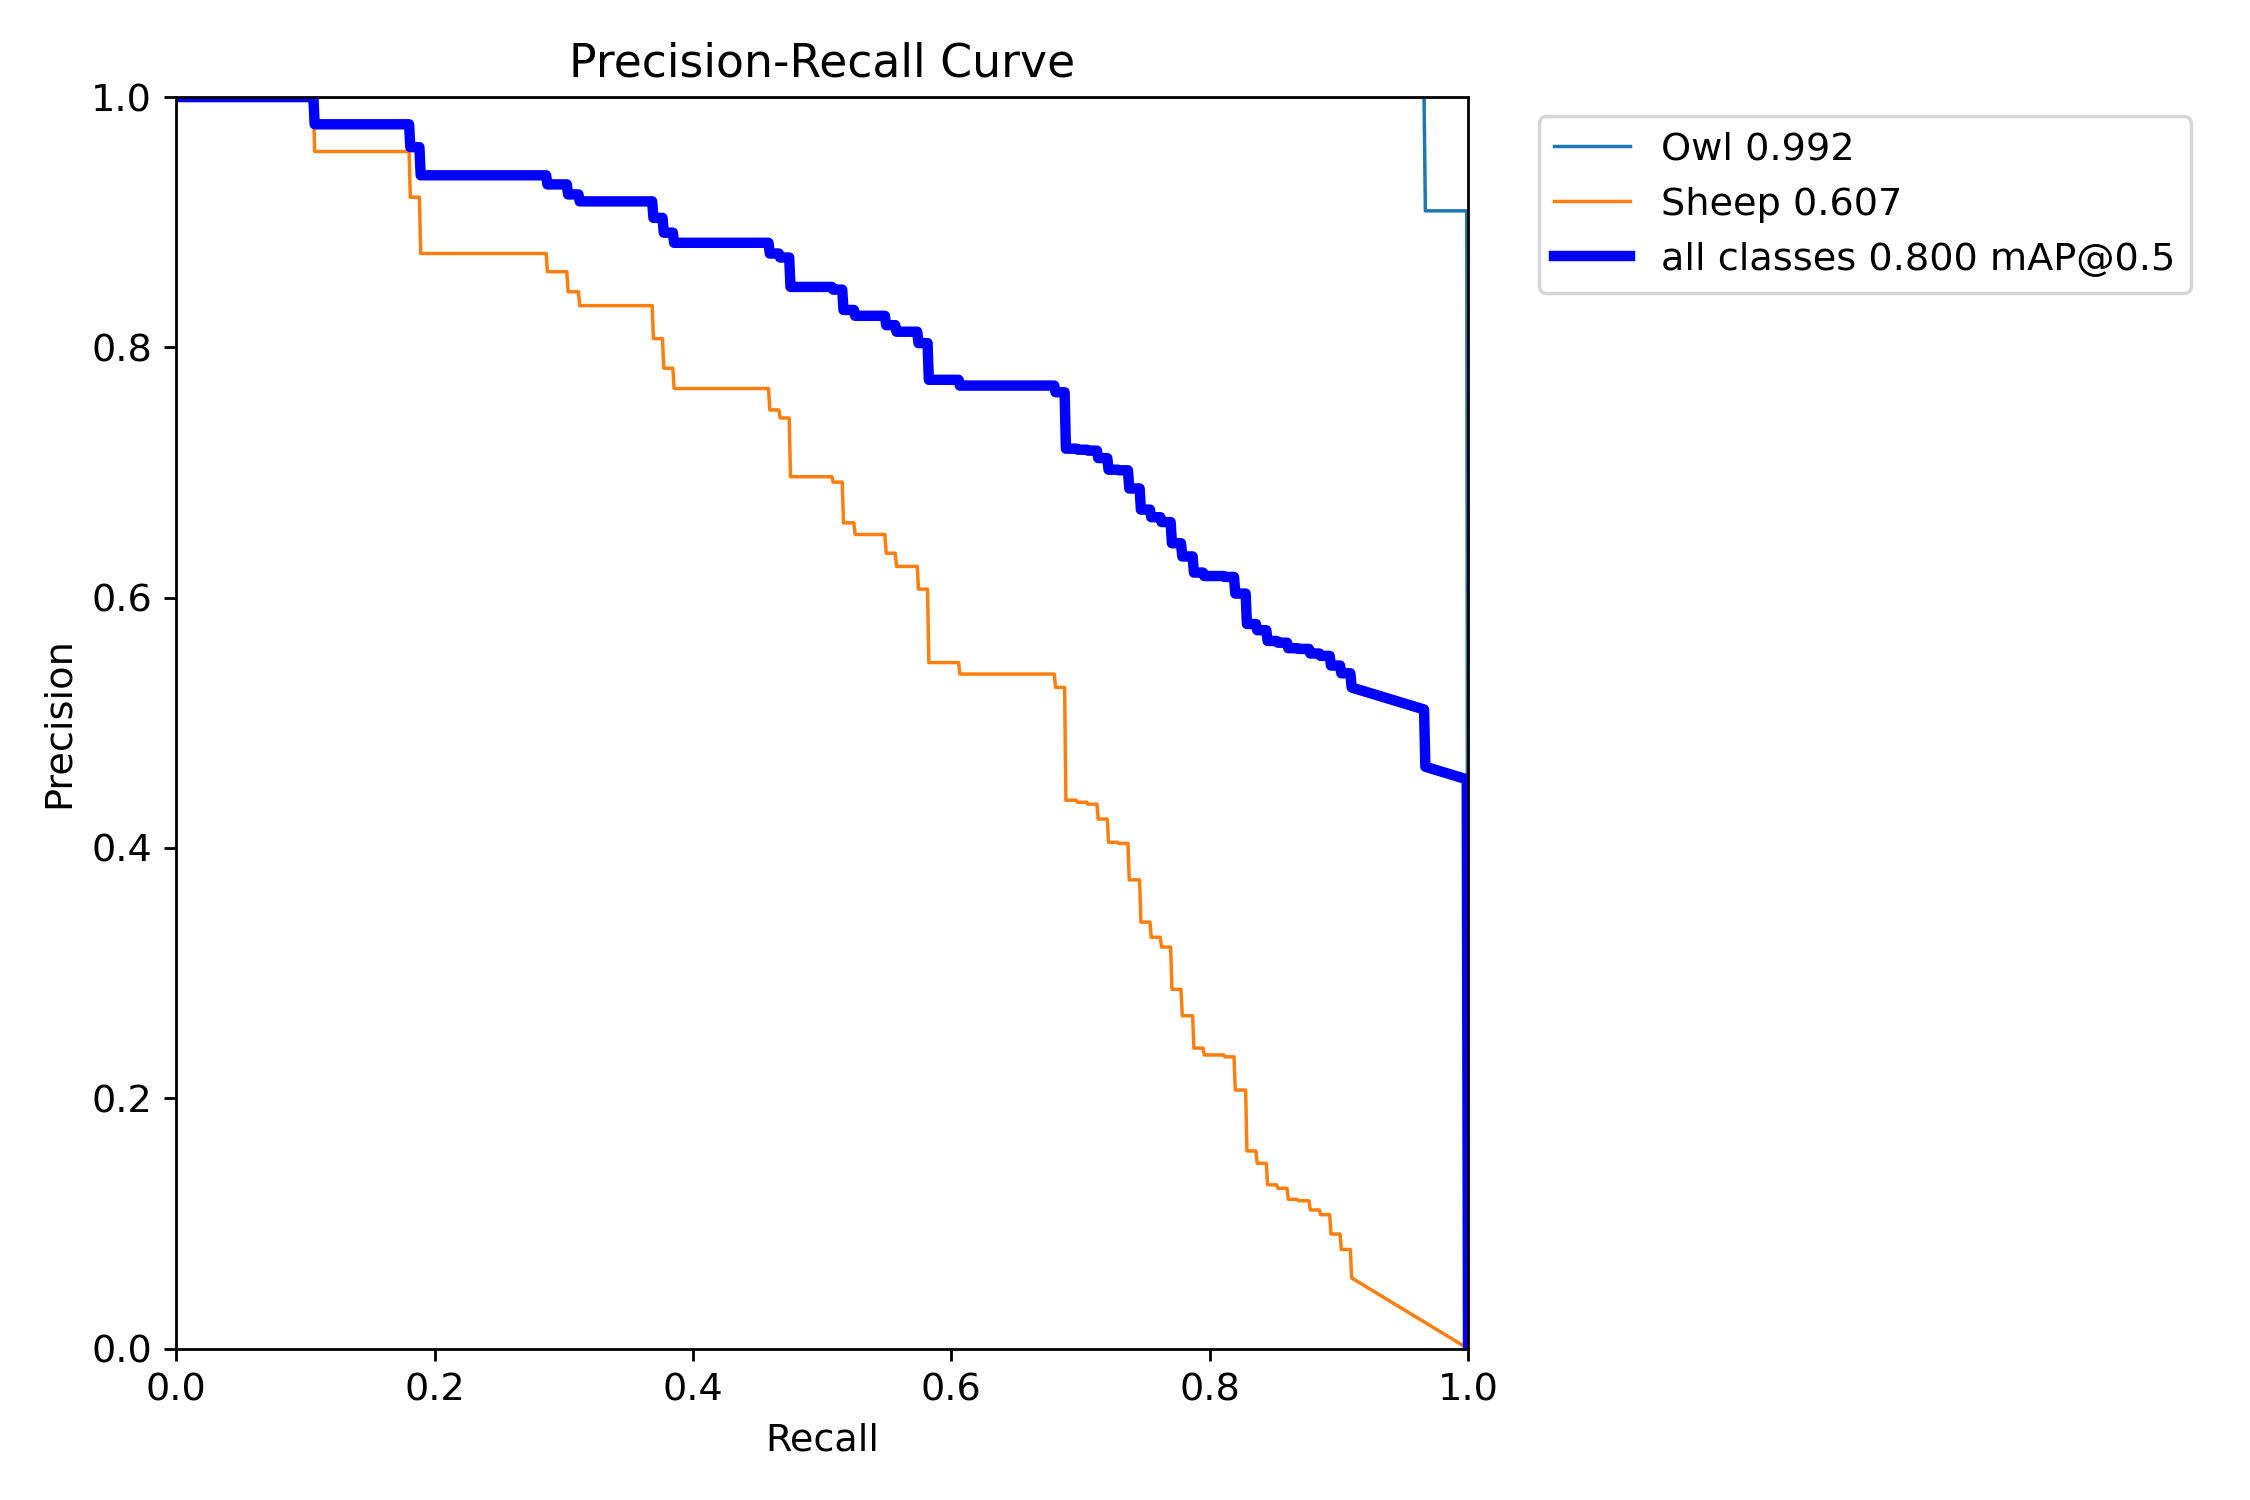

In [14]:
Image('/content/train2/PR_curve.png', width=750)

##Confusion matrix

- The model is quite good at identifying "Sheep"
> - model has a significant number of false positives - confuses "background" with "Sheep"
- good performance on the "Owl" class
> - model rarely confuses "Owl" with other classes

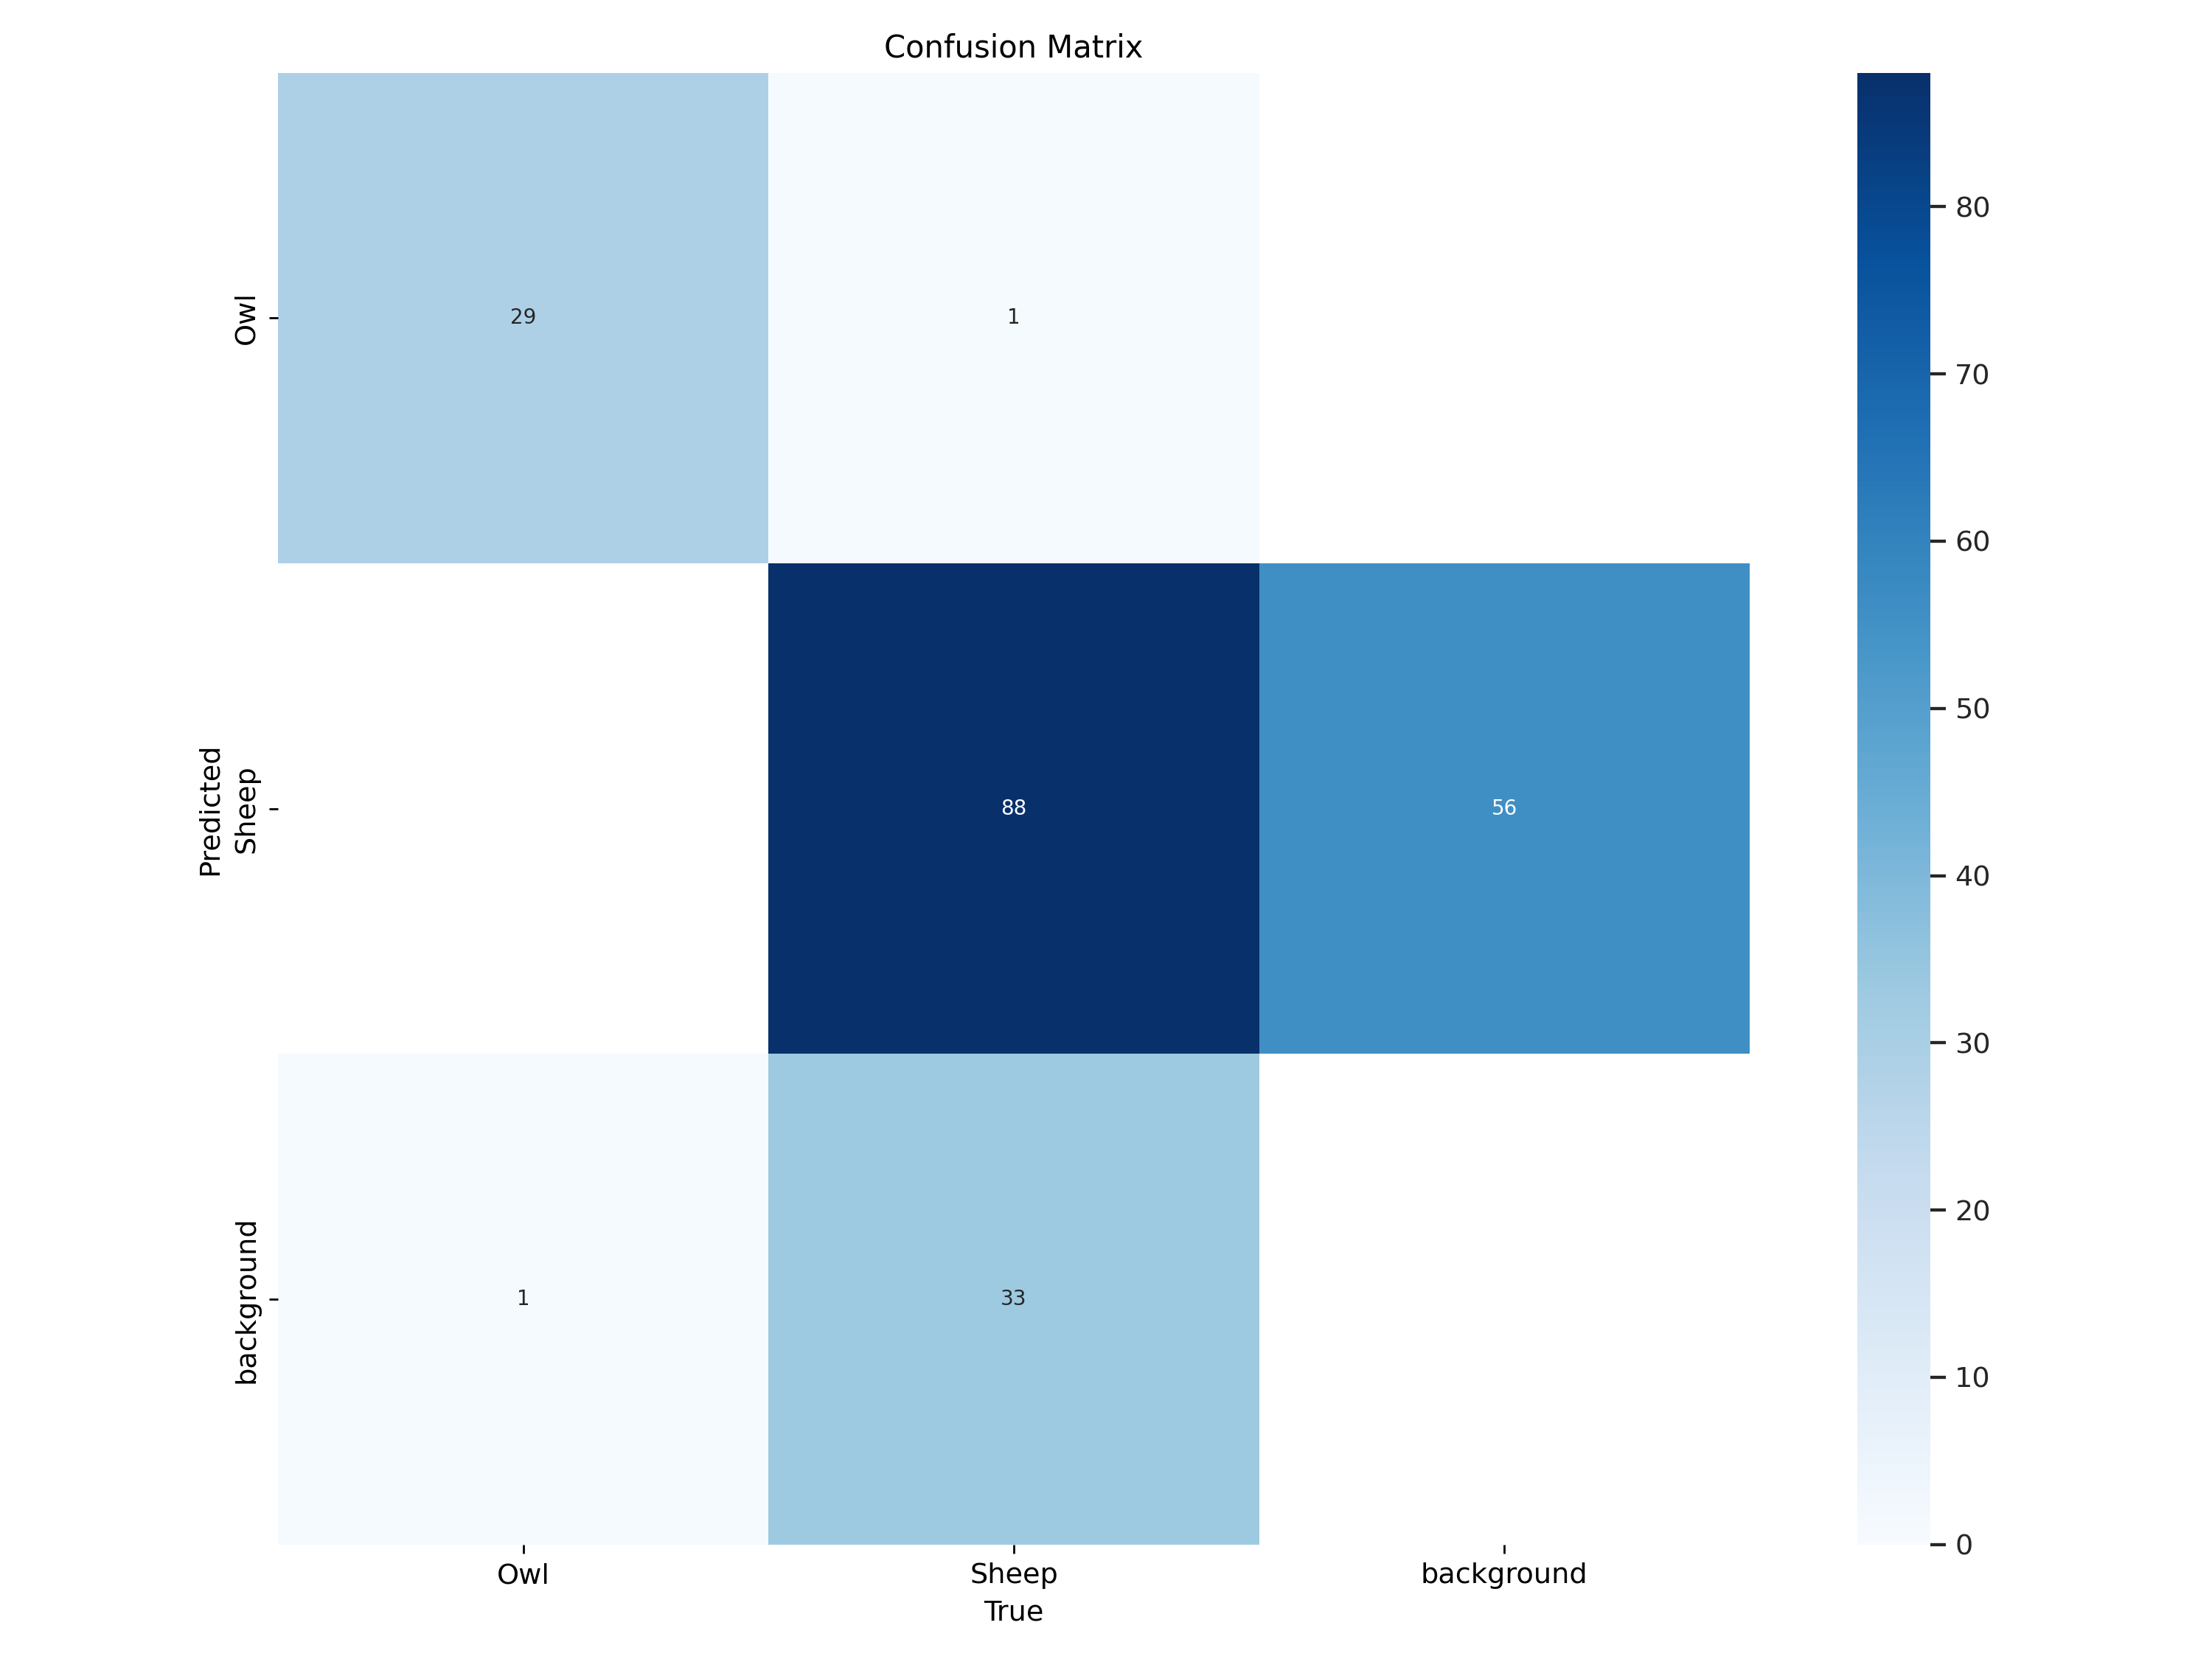

In [12]:
from IPython.display import Image

# Display the image
Image('/content/train2/confusion_matrix.png', width=750)


##F1 score

- The "Owl" class has a high F1 score
> - good model performance
- The "Sheep" class has a much lower F1 score overall
> - model had difficulty correctly classifying sheep (confusing "background" with "Sheep")
- The best balance between precision and recall for all classes combined: confidence threshold of approximately 0.663, where the F1 score is the highest at 0.79

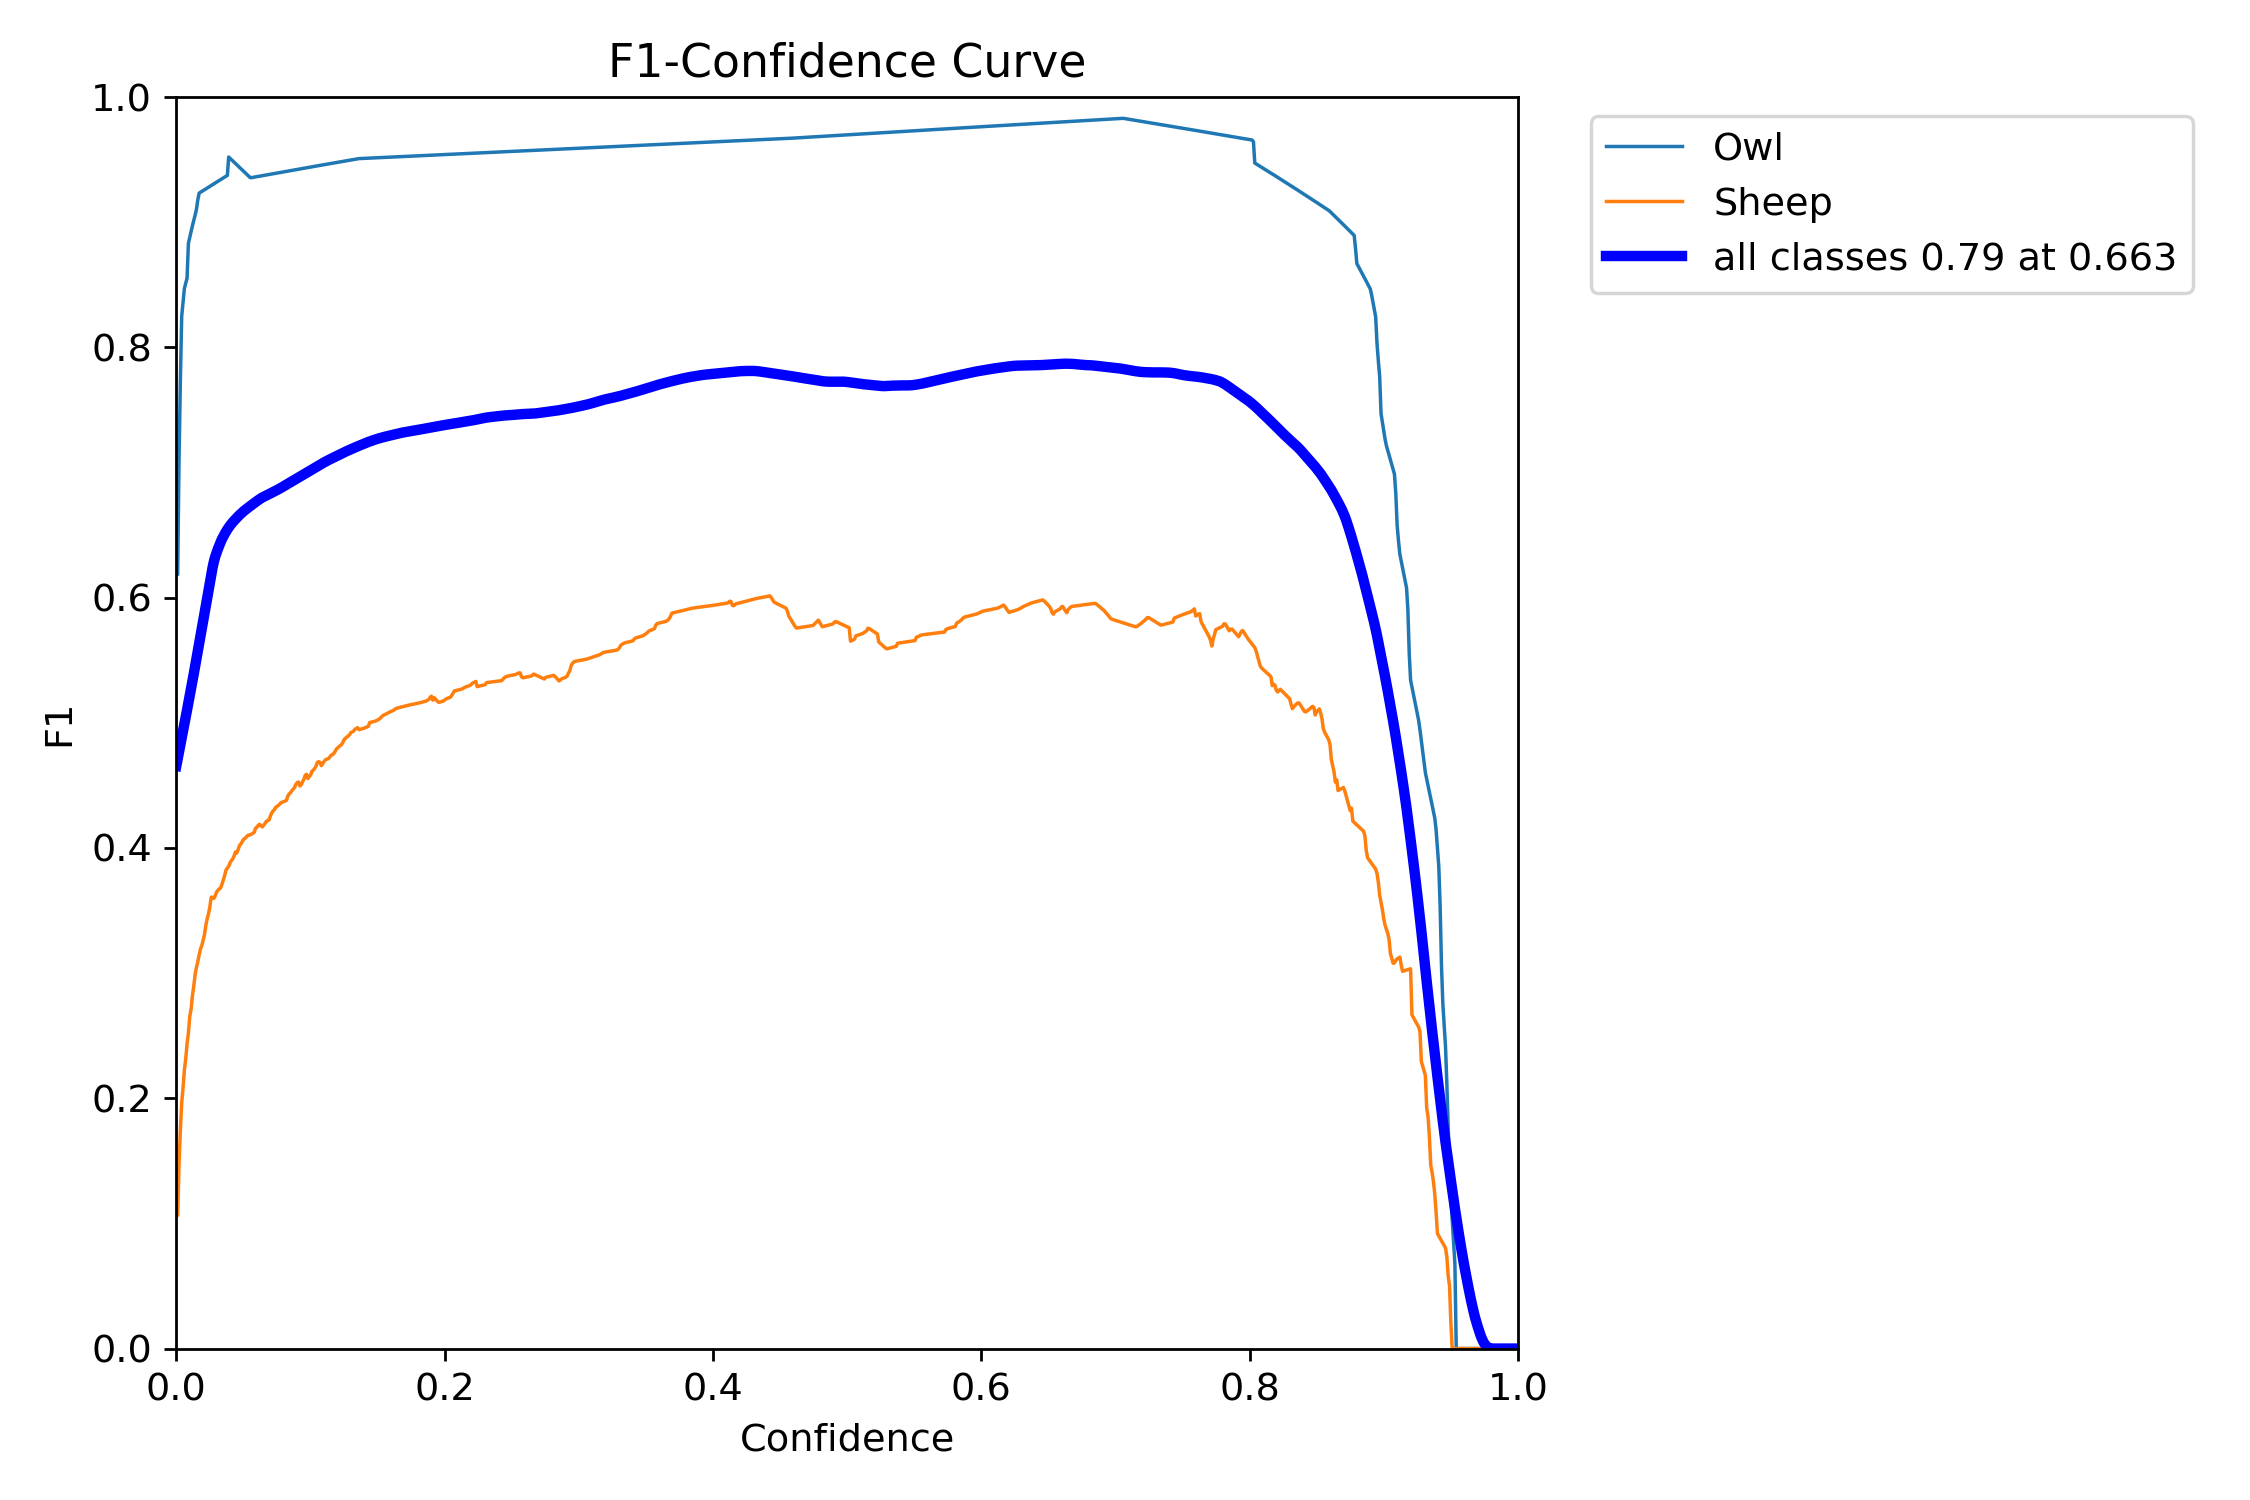

In [13]:
Image('/content/train2/F1_curve.png', width=750)